In [43]:
import pandas as pd
import numpy as np
car = pd.read_csv('CarPrice_Assignment.csv')

car['carcompany'] = car['CarName'].str.split(' ').str[0]
car.drop(['CarName'], axis = 1, inplace = True)
car.drop(['car_ID'], axis = 1, inplace = True)
car['carcompany'] = car['carcompany'].str.replace('vw','volkswagen')
car['carcompany'] = car['carcompany'].str.replace('vokswagen','volkswagen')
car['carcompany'] = car['carcompany'].str.replace('toyouta','toyota')
car['carcompany'] = car['carcompany'].str.replace('maxda','mazda')
car['carcompany'] = car['carcompany'].str.replace('porcshce','porsche')
car['carcompany'] = car['carcompany'].str.replace('Nissan','nissan')

car.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [44]:
car['fueltype'] = car['fueltype'].map({'gas': 1, 'diesel': 0})
car['aspiration'] = car['aspiration'].map({'std': 1, 'turbo': 0})
car['doornumber'] = car['doornumber'].map({'two': 1, 'four': 0})
car['enginelocation'] = car['enginelocation'].map({'front': 1, 'rear': 0})


In [45]:
drivewheel_dummy = pd.get_dummies(car['drivewheel'])#,drop_first=True)
carbody_dummy = pd.get_dummies(car['carbody'])#,drop_first=True)
enginetype_dummy = pd.get_dummies(car['enginetype'])#,drop_first=True)
cylindernumber_dummy = pd.get_dummies(car['cylindernumber'])#,drop_first=True)
fuelsystem_dummy = pd.get_dummies(car['fuelsystem'])#,drop_first=True)
carcompany_dummy = pd.get_dummies(car['carcompany'])#,drop_first=True)


In [46]:
car = pd.concat([car,drivewheel_dummy,carbody_dummy,enginetype_dummy,cylindernumber_dummy,fuelsystem_dummy,carcompany_dummy],axis=1)
car.drop(['drivewheel'],axis=1,inplace=True)
car.drop(['carbody'],axis=1,inplace=True)
car.drop(['enginetype'],axis=1,inplace=True)
car.drop(['cylindernumber'],axis=1,inplace=True)
car.drop(['fuelsystem'],axis=1,inplace=True)
car.drop(['carcompany'],axis=1,inplace=True)
print(car.shape)

(205, 71)


In [47]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.mean(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
car = car.apply(normalize)
car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0.433171,0.097561,0.180488,0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
1,0.433171,0.097561,0.180488,0.560976,0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
2,0.033171,0.097561,0.180488,0.560976,0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
3,0.233171,0.097561,0.180488,-0.439024,0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659
4,0.233171,0.097561,0.180488,-0.439024,0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,...,-0.087805,-0.053659,-0.034146,-0.02439,-0.009756,-0.029268,-0.058537,-0.156098,-0.058537,-0.053659


In [48]:
car.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', '4wd', 'fwd', 'rwd',
       'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight', 'five', 'four',
       'six', 'three', 'twelve', 'two', '1bbl', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'alfa-romero', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [49]:
# Putting feature variable to X
X = car[['symboling', 'fueltype', 'aspiration', 'doornumber',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg','4wd', 'fwd',
       'rwd', 'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight', 'five', 'four',
       'six', 'three', 'twelve', 'two', '1bbl', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi', 'alfa-romero', 'audi', 'bmw', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo']]

# Putting response variable to y
y = car['price']

In [50]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [51]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)
# Calculating Vif value


# We will first begin with condidering all independent variables and then use RFE to eliminate non essentials ones.There will will multiple models to analyze.

# Model 1 - Consider all indipendent variables though this is not ideal

In [52]:
import statsmodels.api as sm          # Importing statsmodels
X_train = sm.add_constant(X_train)    # Adding a constant column to our dataframe
# create a first fitted model
lm_1 = sm.OLS(y_train,X_train).fit()
#Let's see the summary of our first linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     57.59
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           1.40e-49
Time:                        22:34:38   Log-Likelihood:                 295.32
No. Observations:                 143   AIC:                            -474.6
Df Residuals:                      85   BIC:                            -302.8
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling           -0.0089      0.033  

In [53]:
# Calculating Vif value
vif_cal(input_data=car, dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
35,four,inf
44,mfi,inf
50,bmw,inf
49,audi,inf
48,alfa-romero,inf
47,spfi,inf
46,spdi,inf
45,mpfi,inf
43,idi,inf
52,chevrolet,inf


# Model 2 - RFE with 60 indipendent variables eliminating 10 at a time as we started with 70 indipendent variables

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 60)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_) 

[False  True False False  True  True  True  True False  True  True  True
  True  True False False False False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True]
[10  1  7  9  1  1  1  1  3  1  1  1  1  1  5  4  8  6  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  1  1  1
  1  1  1  1  1  1  1  1  1  1 11  1  1  1  1  1  1  1  1  1  1  1]


In [55]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'mfi', 'mercury'],
      dtype='object')

In [56]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     53.76
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           6.76e-51
Time:                        22:34:44   Log-Likelihood:                 273.80
No. Observations:                 143   AIC:                            -447.6
Df Residuals:                      93   BIC:                            -299.4
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.2922      0.112  

In [57]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'carheight', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'mfi', 'mercury'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
18,dohc,inf
20,l,inf
21,ohc,inf
22,ohcf,inf
23,ohcv,inf
24,rotor,inf
25,eight,inf
26,five,inf
27,four,inf


# Model 3 - RFE with 50 indipendent variables eliminating 20 at a time as we started with 70 indipendent variables

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 50)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True False False  True False  True  True False  True  True  True
  True  True False False False False False False  True  True False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True False  True]
[20  1 17 19  1 10  1  1 13  1  1  1  1  1 15 14 18 16  3  6  1  1  9  2
  5  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 12  1  1 11
  1  1  1  1  7  1  1  1  1  1 21  1  1  1  1  1  1  1  1  1  8  1]


In [59]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carheight',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'mfi', 'spfi', 'chevrolet',
       'mercury', 'volkswagen'],
      dtype='object')

In [60]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     63.64
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           9.34e-56
Time:                        22:34:50   Log-Likelihood:                 272.11
No. Observations:                 143   AIC:                            -456.2
Df Residuals:                      99   BIC:                            -325.9
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0045      0.004  

In [61]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carheight',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'mfi', 'spfi', 'chevrolet',
       'mercury', 'volkswagen'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
24,two,inf
22,three,inf
21,six,inf
20,four,inf
19,five,inf
18,eight,inf
17,rotor,inf
16,ohcv,inf
15,ohcf,inf


# Model 4 - RFE with 40 indipendent variables eliminating 30 at a time as we started with 70 indipendent variables

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 40)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True False False  True False  True  True False  True  True  True
  True  True False False False False False False  True  True False False
 False False  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True False
  True False  True False False  True False False False False False  True
 False  True  True  True False  True  True  True False  True]
[30  1 27 29  1 20  1  1 23  1  1  1  1  1 25 24 28 26 13 16  1  1 19 12
 15 14  1  7 11  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 22  1  1 21
  1  6  1  8 17  1  4  9  3  2 31  1 10  1  1  1  5  1  1  1 18  1]


In [63]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carheight',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'mfi', 'spfi',
       'audi', 'buick', 'chevrolet', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'nissan', 'renault', 'volkswagen'],
      dtype='object')

In [64]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     77.61
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           2.16e-61
Time:                        22:35:00   Log-Likelihood:                 266.25
No. Observations:                 143   AIC:                            -460.5
Df Residuals:                     107   BIC:                            -353.8
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0039      0.004  

In [65]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carheight',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'mfi', 'spfi',
       'audi', 'buick', 'chevrolet', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'nissan', 'renault', 'volkswagen'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
13,ohcf,inf
37,subaru,inf
26,idi,inf
22,two,inf
21,twelve,inf
1,enginelocation,inf
19,six,inf
18,four,inf
17,five,inf


# Model 5 - RFE with 30 indipendent variables eliminating 40 at a time as we started with 70 indipendent variables

In [66]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True False False  True False  True  True False  True  True  True
  True  True False False False False False False False  True False False
 False False False False False False  True False  True  True False False
  True  True  True  True  True  True  True  True False  True  True False
 False False  True False False False False False False False False  True
 False  True False  True False  True  True False False  True]
[40  1 37 39  1 30  1  1 33  1  1  1  1  1 35 34 38 36 23 26  8  1 29 22
 25 24  7 17 21  5  1  3  1  1  4  2  1  1  1  1  1  1  1  1 32  1  1 31
  6 16  1 18 27 10 14 19 13 12 41  1 20  1  9  1 15  1  1 11 28  1]


In [67]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carheight',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd', 'rwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc', 'dohcv', 'l', 'ohc',
       'ohcv', 'five', 'four', 'mfi', 'spfi', 'alfa-romero', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'nissan', 'plymouth', 'renault', 'toyota', 'volkswagen'],
      dtype='object')

In [68]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     91.76
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           2.65e-65
Time:                        22:35:05   Log-Likelihood:                 251.83
No. Observations:                 143   AIC:                            -449.7
Df Residuals:                     116   BIC:                            -369.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0031      0.004  

In [69]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carheight',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd', 'rwd',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc', 'dohcv', 'l', 'ohc',
       'ohcv', 'five', 'four', 'mfi', 'spfi', 'alfa-romero', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'nissan', 'plymouth', 'renault', 'toyota', 'volkswagen'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
0,fueltype,inf
28,subaru,inf
16,two,inf
1,enginelocation,inf
11,rotor,inf
10,ohcf,inf
20,idi,inf
8,compressionratio,100.330000
21,mpfi,28.250000
5,enginesize,25.490000


# Model 6 - RFE with 20 indipendent variables eliminating 50 at a time as we started with 70 indipendent variables

In [70]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False  True False False  True False False  True False  True  True  True
  True  True False False False False False False False  True False False
 False False False False False False  True False  True  True False False
  True  True  True  True False False False False False False False False
 False False  True False False False False False False False False False
 False False False  True False  True False False False  True]
[50  1 47 49  1 40  2  1 43  1  1  1  1  1 45 44 48 46 33 36 18  1 39 32
 35 34 17 27 31 15  1 13  1  1 14 12  1  1  1  1  7  6  4  3 42  8  5 41
 16 26  1 28 37 20 24 29 23 22 51  9 30 11 19  1 25  1 10 21 38  1]


In [71]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', '4wd',
       'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc', 'dohcv',
       'l', 'ohc', 'ohcv', 'five', 'four', '1bbl', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'alfa-romero', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'subaru',
       'toyota', 'volkswagen'],
      dtype='object')

In [72]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     119.2
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           9.68e-70
Time:                        22:35:10   Log-Likelihood:                 244.32
No. Observations:                 143   AIC:                            -448.6
Df Residuals:                     123   BIC:                            -389.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0032      0.004  

In [73]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', '4wd',
       'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc', 'dohcv',
       'l', 'ohc', 'ohcv', 'five', 'four', '1bbl', '2bbl', '4bbl', 'idi',
       'mfi', 'mpfi', 'spdi', 'spfi', 'alfa-romero', 'audi', 'buick',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault', 'subaru',
       'toyota', 'volkswagen'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
10,rotor,inf
15,two,inf
0,fueltype,70.070000
7,compressionratio,64.810000
4,enginesize,21.280000
3,curbweight,12.040000
2,carwidth,5.610000
12,six,5.050000
5,boreratio,4.860000
11,eight,4.130000


# Model 7 - RFE with 15 indipendent variables eliminating 55 at a time as we started with 70 indipendent variables

In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False False  True False False  True False  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False  True  True False False
  True  True  True  True False False False False False False False False
 False False  True False False False False False False False False False
 False False False  True False False False False False  True]
[55  2 52 54  1 45  7  1 48  1  1  1  1  3 50 49 53 51 38 41 23  6 44 37
 40 39 22 32 36 20  5 18  1  1 19 17  1  1  1  1 12 11  9  8 47 13 10 46
 21 31  1 33 42 25 29 34 28 27 56 14 35 16 24  1 30  4 15 26 43  1]


In [75]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', '4wd', 'fwd', 'rwd', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'five', 'four', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi', 'alfa-romero', 'audi', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen'],
      dtype='object')

In [76]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_7 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     139.2
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           3.20e-70
Time:                        22:35:15   Log-Likelihood:                 231.47
No. Observations:                 143   AIC:                            -432.9
Df Residuals:                     128   BIC:                            -388.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0042      0.004      0.

In [77]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', '4wd', 'fwd', 'rwd', 'convertible', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf',
       'ohcv', 'five', 'four', '1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi',
       'spdi', 'spfi', 'alfa-romero', 'audi', 'buick', 'chevrolet', 'dodge',
       'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen'], axis=1), dependent_col="price")

C:\Users\Z001MC7\AppData\Local\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Var,Vif
6,rotor,inf
11,two,inf
3,enginesize,20.660000
2,curbweight,9.290000
1,carwidth,5.220000
8,six,4.290000
7,eight,4.010000
4,boreratio,3.620000
0,enginelocation,3.370000
13,porsche,3.250000


# Model 8 - RFE with 10 indipendent variables eliminating 60 at a time as we started with 70 indipendent variables

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[False False False False  True False False  True False  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False  True  True False False False False False False False False False
 False False  True False False False False False False False False False
 False False False  True False False False False False False]
[60  7 57 59  1 50 12  1 53  1  1  1  2  8 55 54 58 56 43 46 28 11 49 42
 45 44 27 37 41 25 10 23  1  4 24 22  3  1  1  5 17 16 14 13 52 18 15 51
 26 36  1 38 47 30 34 39 33 32 61 19 40 21 29  1 35  9 20 31 48  6]


In [79]:
elim = X_train.columns[~rfe.support_]
elim

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd', 'rwd', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'eight', 'five', 'four', 'six', 'two', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'alfa-romero', 'audi',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'],
      dtype='object')

In [80]:
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm_8 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 11 Jun 2018   Prob (F-statistic):           1.21e-64
Time:                        22:35:19   Log-Likelihood:                 206.16
No. Observations:                 143   AIC:                            -390.3
Df Residuals:                     132   BIC:                            -357.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0006      0.005      0.

In [81]:
# Calculating Vif value
vif_cal(input_data=car.drop(['symboling', 'fueltype', 'aspiration', 'doornumber', 'wheelbase',
       'carlength', 'carheight', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', '4wd', 'fwd', 'rwd', 'convertible',
       'hardtop', 'hatchback', 'sedan', 'wagon', 'dohc', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'eight', 'five', 'four', 'six', 'two', '1bbl', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'alfa-romero', 'audi',
       'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], axis=1), dependent_col="price")

,Var,Vif
2,curbweight,7.94
3,enginesize,5.35
1,carwidth,4.67
0,enginelocation,2.82
9,porsche,2.79
4,boreratio,1.91
7,twelve,1.25
5,rotor,1.12
8,bmw,1.09
6,three,1.04


In [86]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

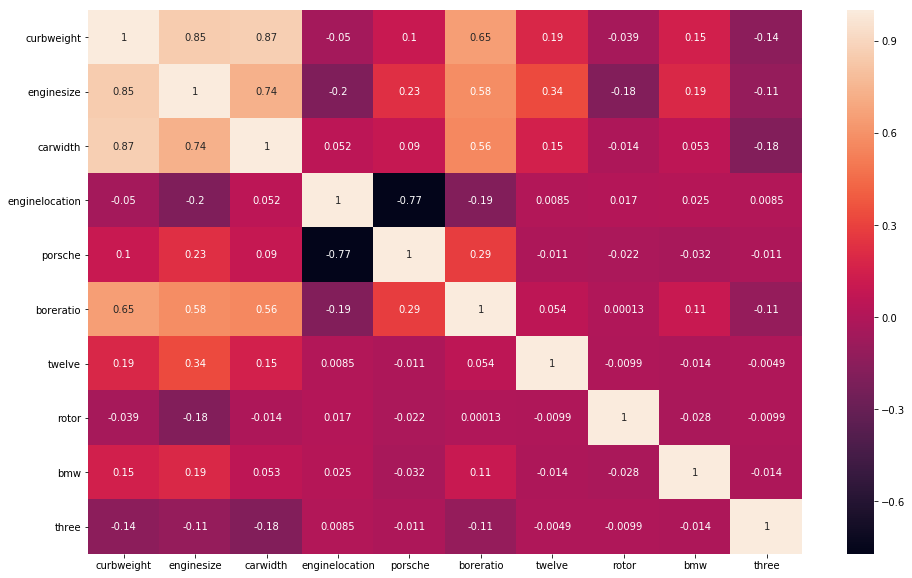

In [99]:
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
car_corr = car[['curbweight','enginesize','carwidth','enginelocation','porsche','boreratio','twelve','rotor','bmw','three']]
sns.heatmap(car_corr.corr(),annot = True)

In [100]:
# Adding  constant variable to test dataframe
X_test_m8 = sm.add_constant(X_test)

# Creating X_test_m8 dataframe by dropping variables from X_test_m6
X_test_m8 = X_test_m8.drop(["symboling", "fueltype", "aspiration", "doornumber", "wheelbase",
       "carlength", "carheight", "stroke", "compressionratio", "horsepower",
       "peakrpm", "citympg", "highwaympg", "4wd", "fwd", "rwd", "convertible",
       "hardtop", "hatchback", "sedan", "wagon", "dohc", "dohcv", "l", "ohc",
       "ohcf", "ohcv", "eight", "five", "four", "six", "two", "1bbl", "2bbl",
       "4bbl", "idi", "mfi", "mpfi", "spdi", "spfi", "alfa-romero", "audi",
       "buick", "chevrolet", "dodge", "honda", "isuzu", "jaguar", "mazda",
       "mercury", "mitsubishi", "nissan", "peugeot", "plymouth", "renault",
       "saab", "subaru", "toyota", "volkswagen", "volvo"], axis=1)

# Making predictions
y_pred_m8 = lm_8.predict(X_test_m8)

ValueError: shapes (62,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)